In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv('weather_AUS.csv')

In [93]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

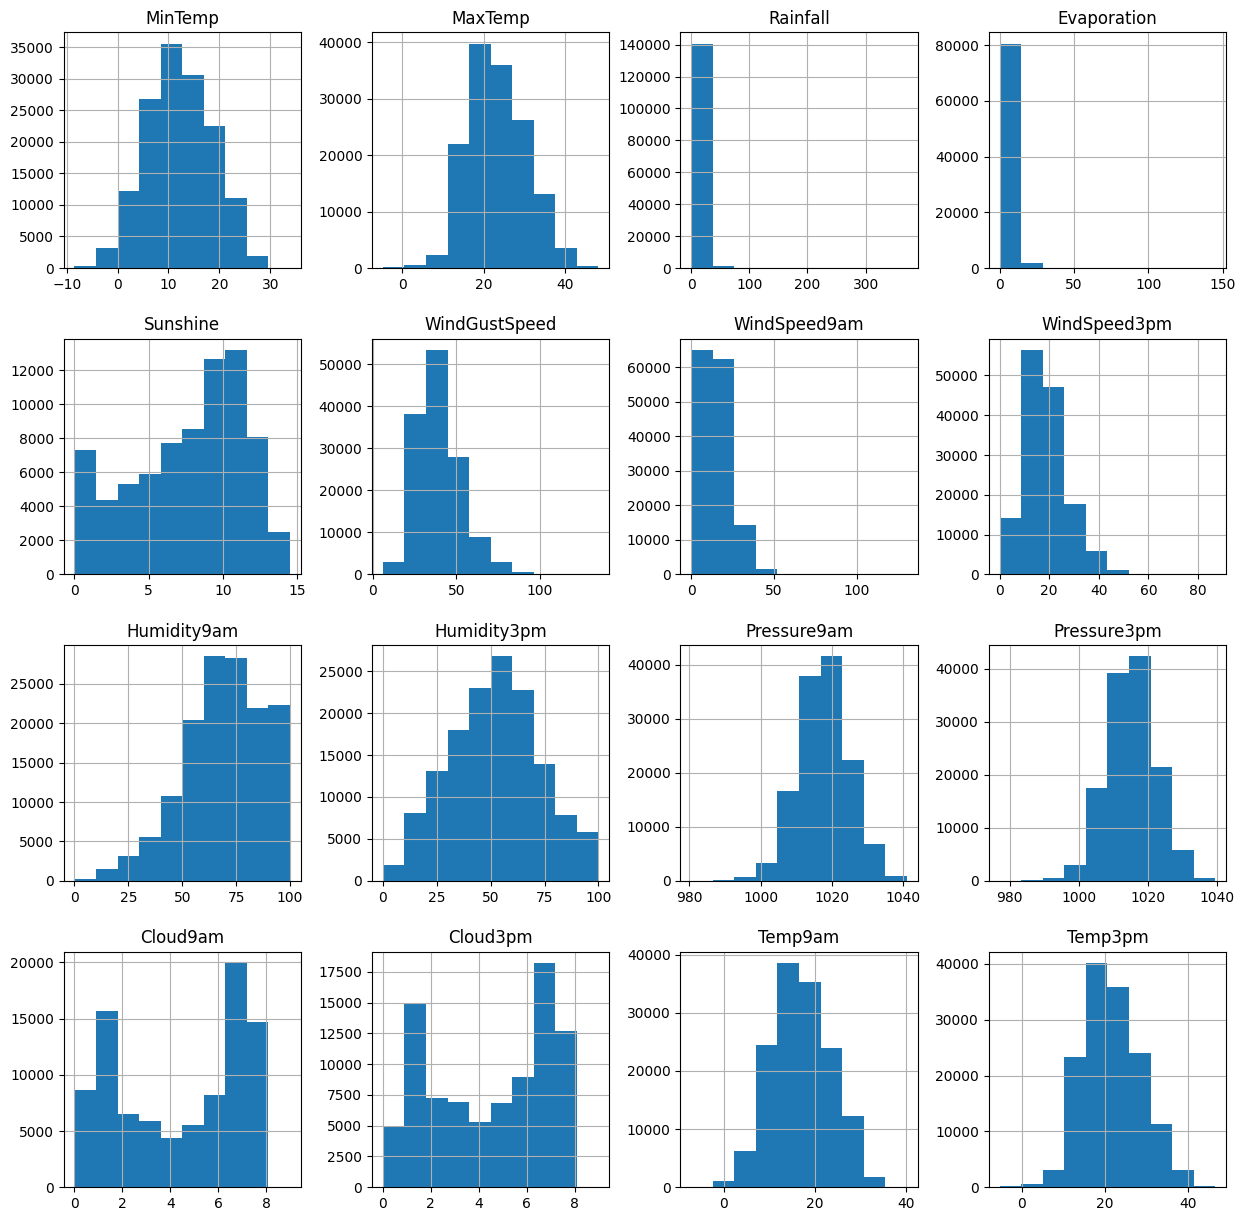

In [95]:
data.hist(figsize=(15,15))

In [43]:
# CHECK THIS WITH THE PROFESSOR
# Downsample based on the 'Evaporation' feature
downsampled_data = data.sample(frac=1, random_state=42)  # Shuffle the data
downsampled_data = downsampled_data.groupby('Evaporation', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))

# The above code shuffles the data and then samples 1000 rows for each unique 'Evaporation' value.

# If we want to keep a specific ratio of rows for each 'Evaporation' value, we can use the following:
# ratio = 0.5  # Change this ratio as needed
# downsampled_data = data.groupby('Evaporation').apply(lambda x: x.sample(frac=ratio, random_state=42))

# Now, downsampled_data contains the downsampled data based on the 'Evaporation' feature.

In [44]:
downsampled_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
105222,7/21/2016,Nuriootpa,7.8,22.0,0.0,0.0,7.0,NW,41.0,ENE,...,95.0,58.0,1015.4,1010.4,3.0,NaN,12.4,20.8,No,Yes
105182,6/11/2016,Nuriootpa,2.8,14.3,3.6,0.0,6.6,SW,30.0,N,...,93.0,69.0,1031.0,1031.3,6.0,NaN,7.6,13.1,Yes,No
69004,9/6/2013,Melbourne,11.8,15.3,3.2,0.0,0.0,N,31.0,N,...,76.0,52.0,1027.2,1024.9,8.0,8.0,13.7,14.9,Yes,NaN
68232,5/29/2011,Melbourne,10.5,14.3,0.0,0.0,0.0,SSE,19.0,NaN,...,89.0,72.0,1026.7,1024.9,NaN,NaN,11.0,14.0,No,No
130187,6/15/2009,Hobart,5.6,8.6,0.2,0.0,1.9,NNW,26.0,WSW,...,73.0,63.0,1019.7,1019.0,6.0,7.0,6.6,8.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107290,12/23/2013,Woomera,14.4,27.2,3.0,77.3,NaN,S,56.0,S,...,65.0,30.0,1016.1,1015.2,1.0,7.0,17.0,24.9,Yes,No
105935,1/9/2010,Woomera,26.6,41.7,0.0,81.2,13.2,N,48.0,NE,...,22.0,10.0,1013.9,1011.9,0.0,4.0,33.6,40.3,No,No
106968,1/7/2013,Woomera,24.6,45.3,0.0,82.4,NaN,SE,74.0,ESE,...,22.0,9.0,1013.8,1009.4,0.0,1.0,31.8,44.0,No,No
8831,11/11/2016,Cobar,19.1,35.3,0.0,86.2,NaN,NNW,35.0,NW,...,NaN,NaN,1009.3,1004.6,NaN,NaN,26.7,34.1,No,No


In [45]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55265 entries, 105222 to 42358
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           55265 non-null  object 
 1   Location       55265 non-null  object 
 2   MinTemp        54828 non-null  float64
 3   MaxTemp        54842 non-null  float64
 4   Rainfall       54660 non-null  float64
 5   Evaporation    55265 non-null  float64
 6   Sunshine       47370 non-null  float64
 7   WindGustDir    52168 non-null  object 
 8   WindGustSpeed  52190 non-null  float64
 9   WindDir9am     52920 non-null  object 
 10  WindDir3pm     54412 non-null  object 
 11  WindSpeed9am   54923 non-null  float64
 12  WindSpeed3pm   54668 non-null  float64
 13  Humidity9am    54548 non-null  float64
 14  Humidity3pm    53831 non-null  float64
 15  Pressure9am    54651 non-null  float64
 16  Pressure3pm    54652 non-null  float64
 17  Cloud9am       48358 non-null  float64
 18  Cloud3

In [46]:
downsampled_data.dropna(inplace=True)

In [47]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           37885 non-null  object 
 1   Location       37885 non-null  object 
 2   MinTemp        37885 non-null  float64
 3   MaxTemp        37885 non-null  float64
 4   Rainfall       37885 non-null  float64
 5   Evaporation    37885 non-null  float64
 6   Sunshine       37885 non-null  float64
 7   WindGustDir    37885 non-null  object 
 8   WindGustSpeed  37885 non-null  float64
 9   WindDir9am     37885 non-null  object 
 10  WindDir3pm     37885 non-null  object 
 11  WindSpeed9am   37885 non-null  float64
 12  WindSpeed3pm   37885 non-null  float64
 13  Humidity9am    37885 non-null  float64
 14  Humidity3pm    37885 non-null  float64
 15  Pressure9am    37885 non-null  float64
 16  Pressure3pm    37885 non-null  float64
 17  Cloud9am       37885 non-null  float64
 18  Cloud

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
downsampled_data['WindGustDir'] = le.fit_transform(downsampled_data['WindGustDir'])
downsampled_data['WindDir9am'] = le.fit_transform(downsampled_data['WindDir9am'])
downsampled_data['WindDir3pm'] = le.fit_transform(downsampled_data['WindDir3pm'])
downsampled_data['RainToday'] = le.fit_transform(downsampled_data['RainToday'])
downsampled_data['RainTomorrow'] = le.fit_transform(downsampled_data['RainTomorrow'])

In [50]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           37885 non-null  object 
 1   Location       37885 non-null  object 
 2   MinTemp        37885 non-null  float64
 3   MaxTemp        37885 non-null  float64
 4   Rainfall       37885 non-null  float64
 5   Evaporation    37885 non-null  float64
 6   Sunshine       37885 non-null  float64
 7   WindGustDir    37885 non-null  int64  
 8   WindGustSpeed  37885 non-null  float64
 9   WindDir9am     37885 non-null  int64  
 10  WindDir3pm     37885 non-null  int64  
 11  WindSpeed9am   37885 non-null  float64
 12  WindSpeed3pm   37885 non-null  float64
 13  Humidity9am    37885 non-null  float64
 14  Humidity3pm    37885 non-null  float64
 15  Pressure9am    37885 non-null  float64
 16  Pressure3pm    37885 non-null  float64
 17  Cloud9am       37885 non-null  float64
 18  Cloud

In [12]:
#downsampled_data = downsampled_data.drop(["Location", "Date"], axis =1)
#downsampled_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
138214,16.9,23.8,24.2,0.0,0.0,8,35.0,10,11,15.0,...,92.0,86.0,1005.4,1002.9,8.0,8.0,18.4,22.1,1,1
21854,21.7,27.1,3.0,0.0,9.1,4,46.0,4,4,31.0,...,89.0,71.0,1006.7,1007.2,6.0,3.0,24.5,26.3,1,0
39641,17.7,27.6,1.8,0.0,6.7,7,35.0,14,7,17.0,...,90.0,51.0,1014.9,1010.7,6.0,4.0,19.7,26.6,1,0
136746,14.7,18.0,10.6,0.0,0.0,9,46.0,9,2,22.0,...,93.0,76.0,1020.2,1018.4,8.0,8.0,15.3,17.6,1,0
101453,6.2,14.3,0.8,0.0,0.9,3,70.0,5,4,15.0,...,99.0,84.0,1019.2,1011.5,8.0,8.0,10.5,12.6,0,1


In [51]:
downsampled_data['Date'] = pd.to_datetime(downsampled_data['Date'])
downsampled_data['Date']

130187   2009-06-15
85725    2013-06-12
76504    2013-06-02
79285    2012-08-19
36385    2017-02-02
            ...    
105940   2010-01-14
14616    2016-03-23
105949   2010-01-23
105965   2010-02-08
105935   2010-01-09
Name: Date, Length: 37885, dtype: datetime64[ns]

In [52]:
downsampled_data['Day'] = downsampled_data['Date'].dt.day
downsampled_data['Month'] = downsampled_data['Date'].dt.month
downsampled_data['Year'] = downsampled_data['Date'].dt.year

In [53]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           37885 non-null  datetime64[ns]
 1   Location       37885 non-null  object        
 2   MinTemp        37885 non-null  float64       
 3   MaxTemp        37885 non-null  float64       
 4   Rainfall       37885 non-null  float64       
 5   Evaporation    37885 non-null  float64       
 6   Sunshine       37885 non-null  float64       
 7   WindGustDir    37885 non-null  int64         
 8   WindGustSpeed  37885 non-null  float64       
 9   WindDir9am     37885 non-null  int64         
 10  WindDir3pm     37885 non-null  int64         
 11  WindSpeed9am   37885 non-null  float64       
 12  WindSpeed3pm   37885 non-null  float64       
 13  Humidity9am    37885 non-null  float64       
 14  Humidity3pm    37885 non-null  float64       
 15  Pressure9am    378

In [54]:
downsampled_data = downsampled_data.drop(["Location", "Date"], axis =1)
downsampled_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
130187,5.6,8.6,0.2,0.0,1.9,6,26.0,15,3,6.0,...,1019.0,6.0,7.0,6.6,8.3,0,0,15,6,2009
85725,16.3,22.0,0.2,0.0,1.5,5,26.0,15,4,4.0,...,1013.5,8.0,6.0,17.9,21.3,0,1,12,6,2013
76504,10.9,14.9,0.4,0.0,4.7,11,33.0,11,12,15.0,...,1022.3,8.0,8.0,13.2,14.5,0,0,2,6,2013
79285,7.6,12.7,3.8,0.0,0.3,3,24.0,15,14,7.0,...,1021.6,7.0,7.0,9.3,12.2,1,0,19,8,2012
36385,19.9,25.2,0.2,0.0,6.0,8,56.0,11,8,39.0,...,1014.0,7.0,7.0,22.3,23.8,0,0,2,2,2017


In [55]:
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        37885 non-null  float64
 1   MaxTemp        37885 non-null  float64
 2   Rainfall       37885 non-null  float64
 3   Evaporation    37885 non-null  float64
 4   Sunshine       37885 non-null  float64
 5   WindGustDir    37885 non-null  int64  
 6   WindGustSpeed  37885 non-null  float64
 7   WindDir9am     37885 non-null  int64  
 8   WindDir3pm     37885 non-null  int64  
 9   WindSpeed9am   37885 non-null  float64
 10  WindSpeed3pm   37885 non-null  float64
 11  Humidity9am    37885 non-null  float64
 12  Humidity3pm    37885 non-null  float64
 13  Pressure9am    37885 non-null  float64
 14  Pressure3pm    37885 non-null  float64
 15  Cloud9am       37885 non-null  float64
 16  Cloud3pm       37885 non-null  float64
 17  Temp9am        37885 non-null  float64
 18  Temp3

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>],
       [<Axes: title={'center': 'WindGustDir'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindDir9am'}>,
        <Axes: title={'center': 'WindDir3pm'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'RainToday'}>],
       [<Axes: title={'center': 'RainTomorro

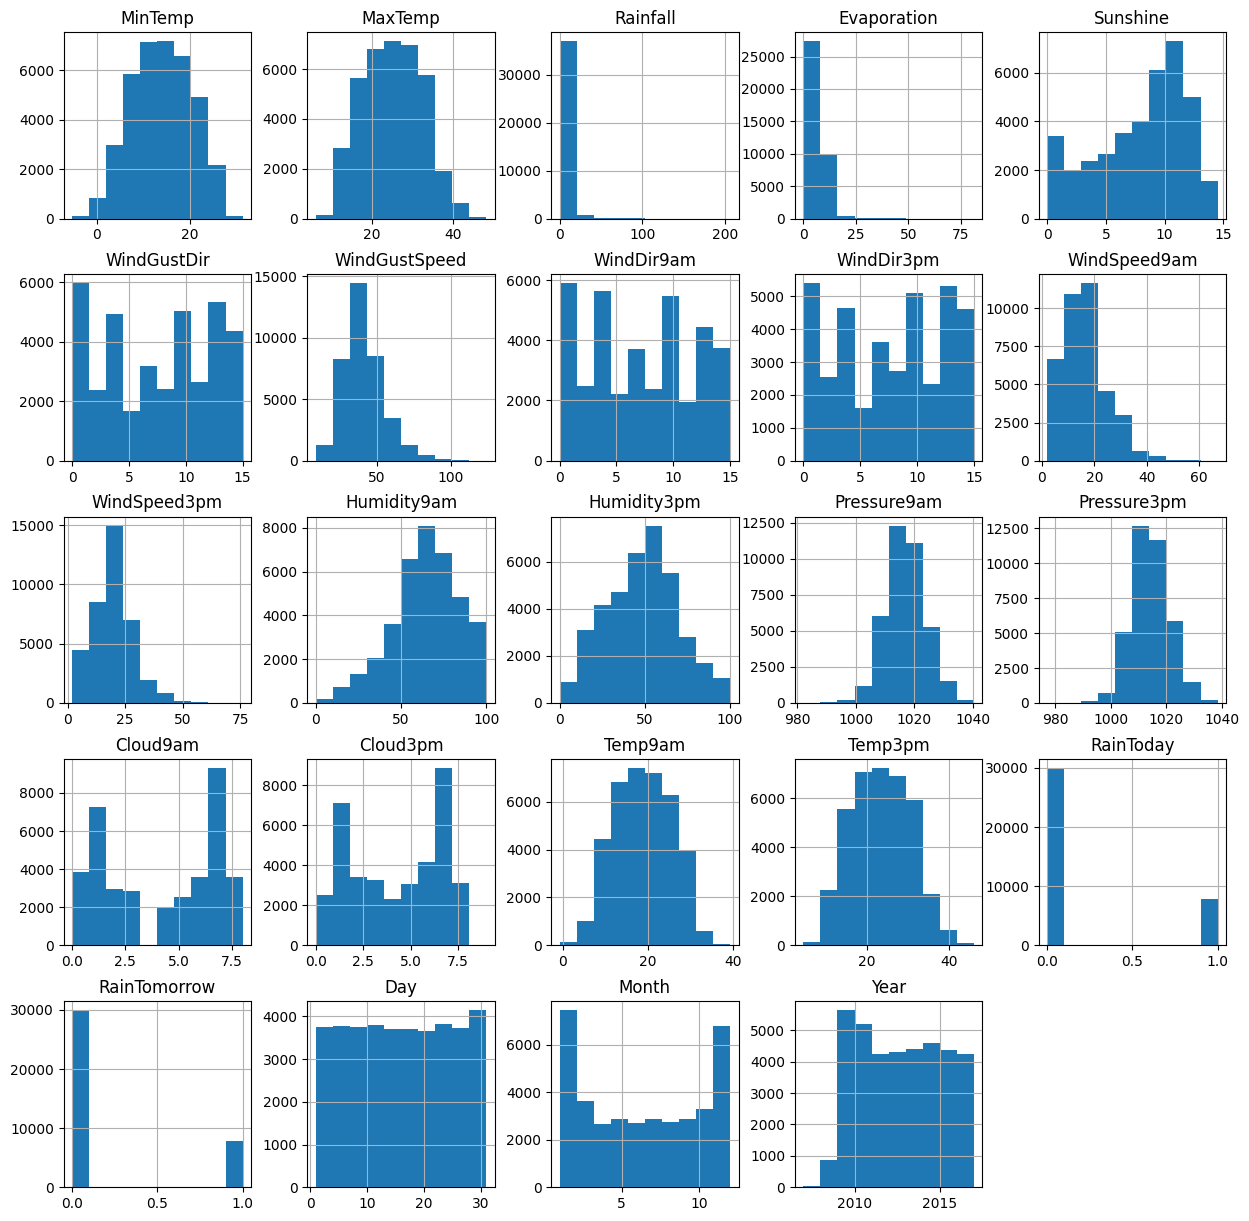

In [56]:
downsampled_data.hist(figsize=(15,15))

In [57]:
x = downsampled_data.drop(['RainTomorrow'], axis = 1)
y = downsampled_data['RainTomorrow']

In [58]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
130187,5.6,8.6,0.2,0.0,1.9,6,26.0,15,3,6.0,...,1019.7,1019.0,6.0,7.0,6.6,8.3,0,15,6,2009
85725,16.3,22.0,0.2,0.0,1.5,5,26.0,15,4,4.0,...,1018.1,1013.5,8.0,6.0,17.9,21.3,0,12,6,2013
76504,10.9,14.9,0.4,0.0,4.7,11,33.0,11,12,15.0,...,1021.1,1022.3,8.0,8.0,13.2,14.5,0,2,6,2013
79285,7.6,12.7,3.8,0.0,0.3,3,24.0,15,14,7.0,...,1023.3,1021.6,7.0,7.0,9.3,12.2,1,19,8,2012
36385,19.9,25.2,0.2,0.0,6.0,8,56.0,11,8,39.0,...,1013.4,1014.0,7.0,7.0,22.3,23.8,0,2,2,2017


In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        37885 non-null  float64
 1   MaxTemp        37885 non-null  float64
 2   Rainfall       37885 non-null  float64
 3   Evaporation    37885 non-null  float64
 4   Sunshine       37885 non-null  float64
 5   WindGustDir    37885 non-null  int64  
 6   WindGustSpeed  37885 non-null  float64
 7   WindDir9am     37885 non-null  int64  
 8   WindDir3pm     37885 non-null  int64  
 9   WindSpeed9am   37885 non-null  float64
 10  WindSpeed3pm   37885 non-null  float64
 11  Humidity9am    37885 non-null  float64
 12  Humidity3pm    37885 non-null  float64
 13  Pressure9am    37885 non-null  float64
 14  Pressure3pm    37885 non-null  float64
 15  Cloud9am       37885 non-null  float64
 16  Cloud3pm       37885 non-null  float64
 17  Temp9am        37885 non-null  float64
 18  Temp3

In [17]:
#numeric_data = downsampled_data.select_dtypes(include=['float64', 'int32'])

<Axes: >

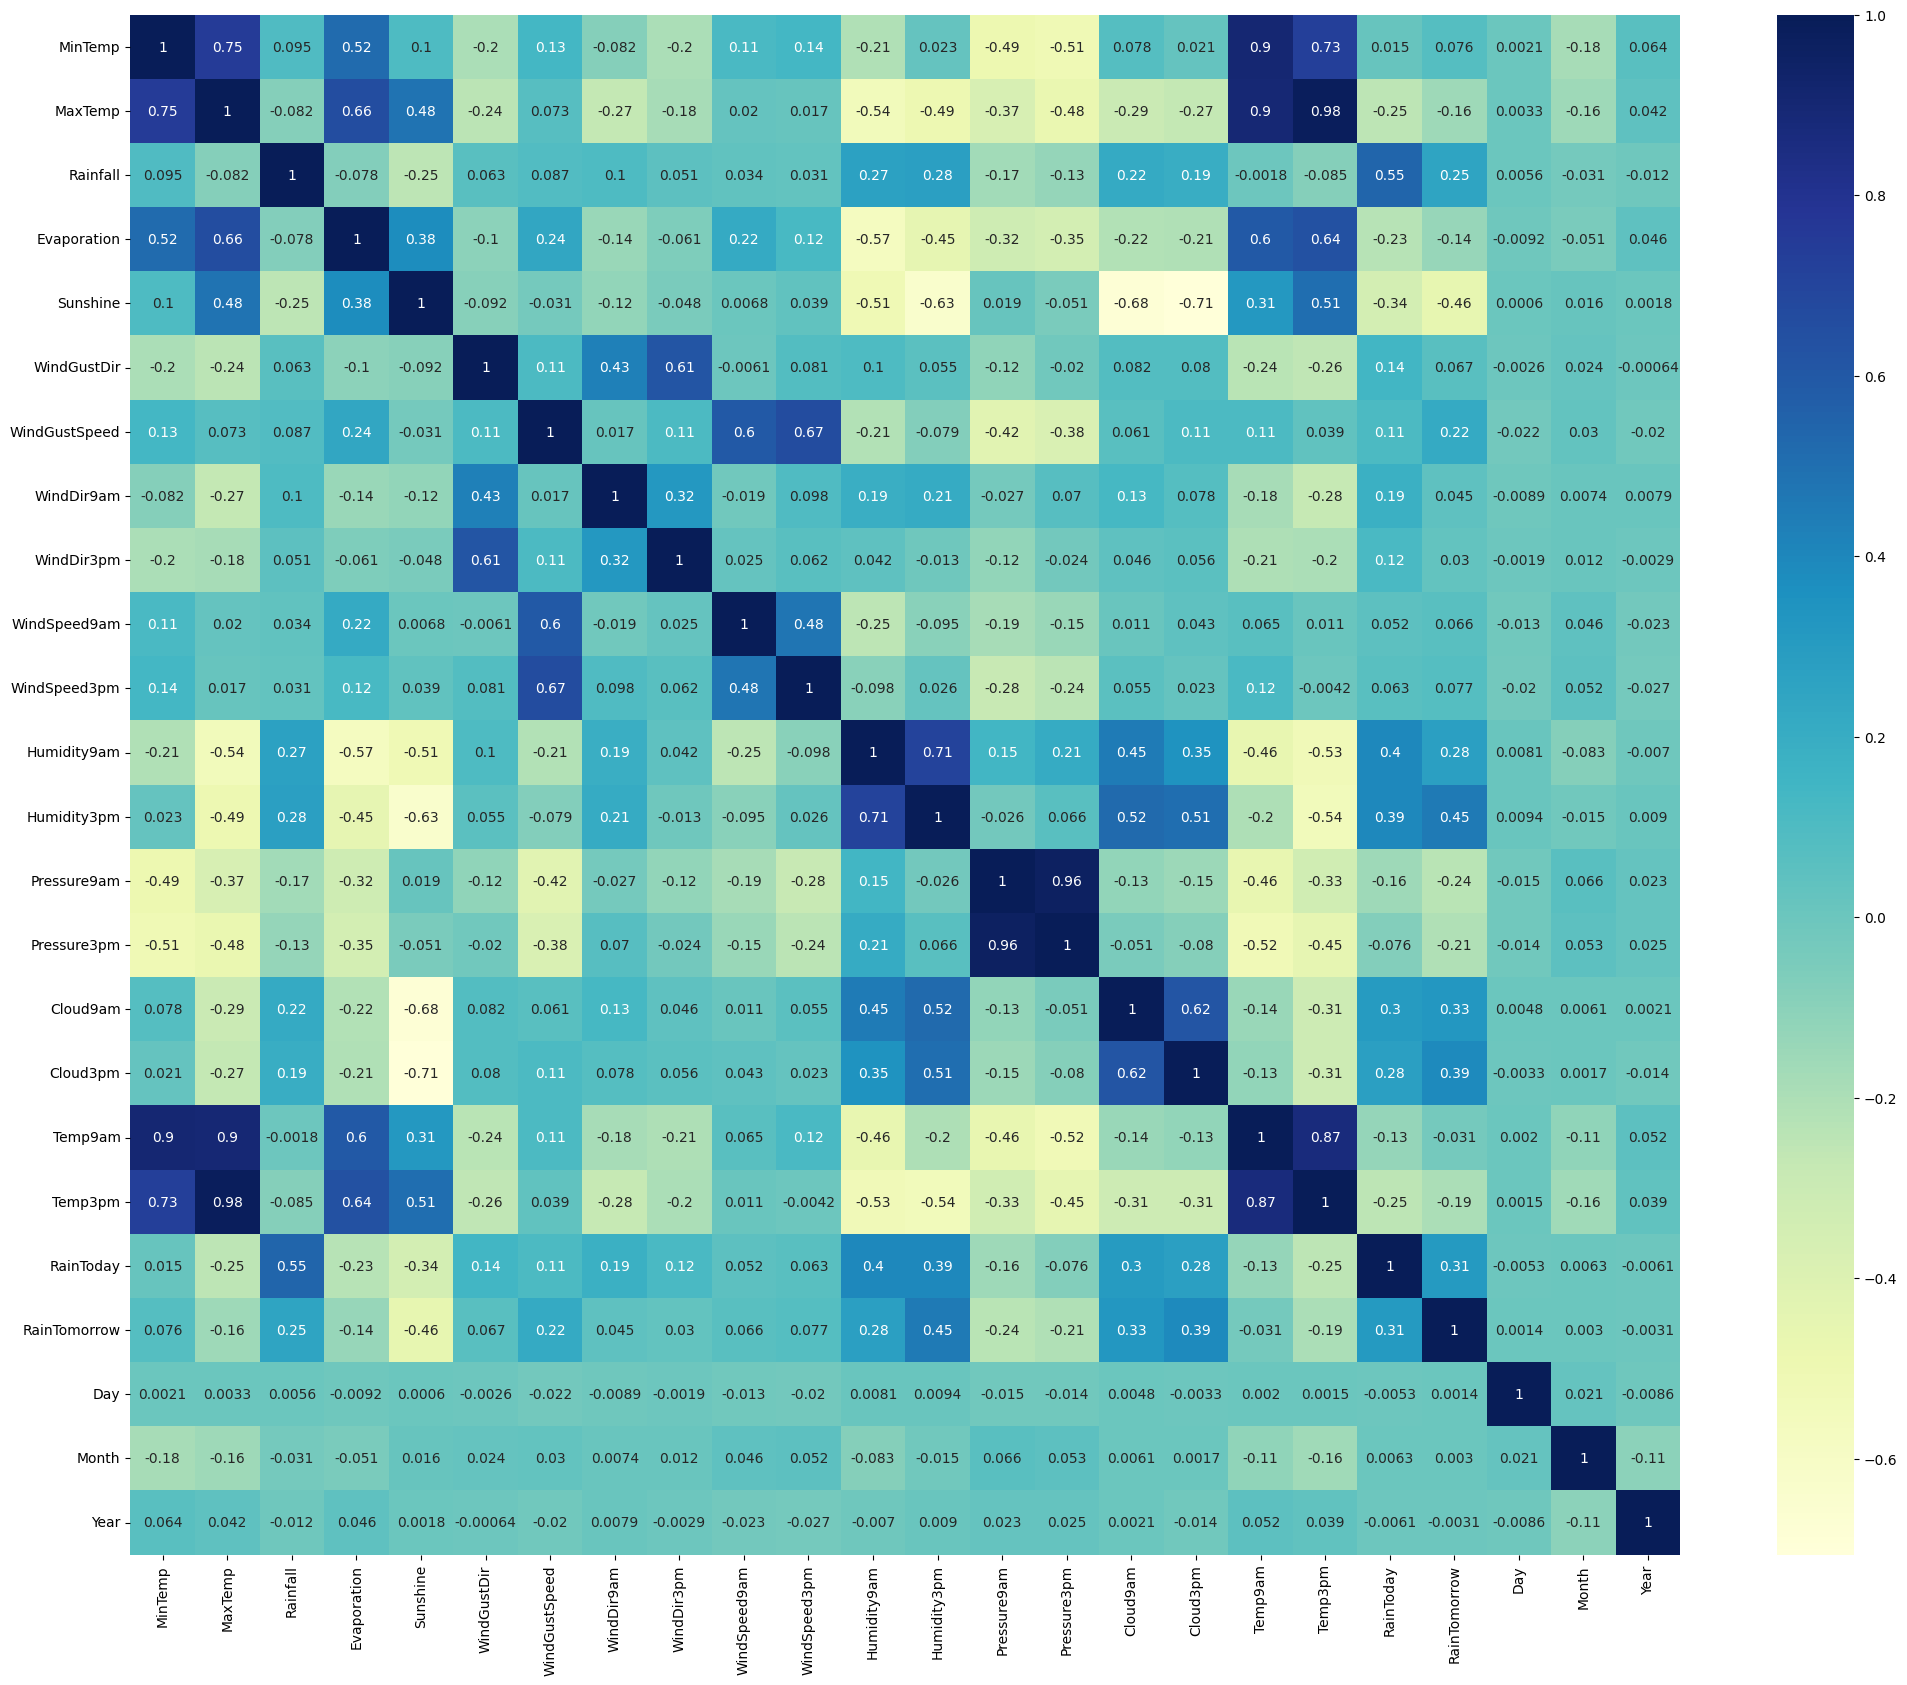

In [60]:
plt.figure(figsize=(25,20))
sns.heatmap(downsampled_data.corr(), annot=True, cmap="YlGnBu")

In [61]:
downsampled_data = downsampled_data.drop(["MaxTemp", "Evaporation", "Sunshine", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "Year"], axis =1)
downsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37885 entries, 130187 to 105935
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        37885 non-null  float64
 1   Rainfall       37885 non-null  float64
 2   WindGustDir    37885 non-null  int64  
 3   WindGustSpeed  37885 non-null  float64
 4   WindDir9am     37885 non-null  int64  
 5   WindDir3pm     37885 non-null  int64  
 6   WindSpeed9am   37885 non-null  float64
 7   WindSpeed3pm   37885 non-null  float64
 8   Humidity9am    37885 non-null  float64
 9   Humidity3pm    37885 non-null  float64
 10  Cloud9am       37885 non-null  float64
 11  Cloud3pm       37885 non-null  float64
 12  RainToday      37885 non-null  int64  
 13  RainTomorrow   37885 non-null  int64  
 14  Day            37885 non-null  int32  
 15  Month          37885 non-null  int32  
dtypes: float64(9), int32(2), int64(5)
memory usage: 4.6 MB


In [62]:
downsampled_data

,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Day,Month
130187,5.6,0.2,6,26.0,15,3,6.0,13.0,73.0,63.0,6.0,7.0,0,0,15,6
85725,16.3,0.2,5,26.0,15,4,4.0,13.0,97.0,83.0,8.0,6.0,0,1,12,6
76504,10.9,0.4,11,33.0,11,12,15.0,17.0,73.0,83.0,8.0,8.0,0,0,2,6
79285,7.6,3.8,3,24.0,15,14,7.0,7.0,69.0,57.0,7.0,7.0,1,0,19,8
36385,19.9,0.2,8,56.0,11,8,39.0,28.0,81.0,70.0,7.0,7.0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105940,16.3,0.0,10,48.0,9,10,22.0,15.0,46.0,17.0,0.0,1.0,0,0,14,1
14616,14.3,5.8,10,31.0,0,10,17.0,9.0,58.0,23.0,1.0,4.0,1,0,23,3
105949,17.0,0.0,8,48.0,10,8,31.0,24.0,55.0,17.0,0.0,5.0,0,0,23,1
105965,25.7,0.0,9,50.0,0,0,15.0,19.0,26.0,18.0,1.0,4.0,0,0,8,2


<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

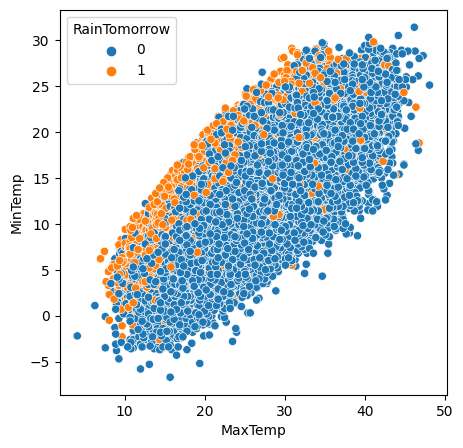

In [19]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , data = downsampled_data)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

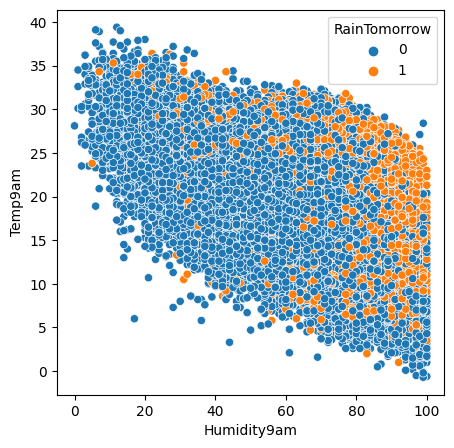

In [20]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', data = downsampled_data)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [64]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Logistic Regression

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[5641  317]
 [ 738  881]]
Accuracy:
0.8607628348950772
Balanced Accuracy:
0.745478644934969
Sensitivity (Recall):
0.5441630636195183
Specificity:
0.9467942262504196
F1 Score:
0.625488107916223
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5958
           1       0.74      0.54      0.63      1619

    accuracy                           0.86      7577
   macro avg       0.81      0.75      0.77      7577
weighted avg       0.85      0.86      0.85      7577



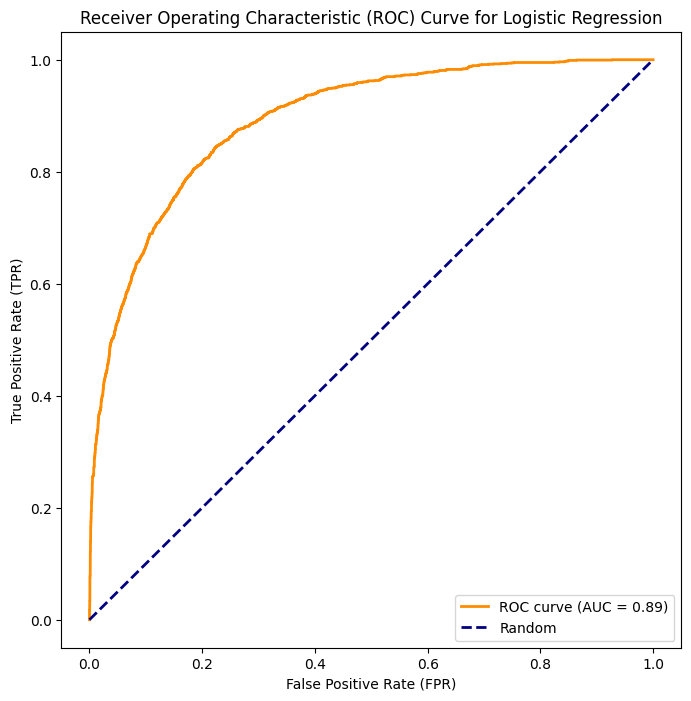

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

predictions_lr = lr.predict(x_test)

lr_cm = confusion_matrix(y_test, predictions_lr)
# Extract TP, TN, FP, FN from confusion matrix
TP, TN, FP, FN = lr_cm[1, 1], lr_cm[0, 0], lr_cm[0, 1], lr_cm[1, 0]
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_lr))
print("Accuracy:")
print(accuracy_score(y_test, predictions_lr))
print("Balanced Accuracy:")
print(balanced_accuracy_score(y_test, predictions_lr))
print("Sensitivity (Recall):")
print(recall_score(y_test, predictions_lr))
print("Specificity:")
print(specificity)
print("F1 Score:")
print(f1_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

predictions_lr_proba = lr.predict_proba(x_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_lr_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


# Decision Tree

Confusion Matrix:
[[5206  752]
 [ 751  868]]
Accuracy:
0.8016365316088162
Balanced Accuracy:
0.7049582821981584
Sensitivity (Recall):
0.5361334156886968
Specificity:
0.87378314870762
F1 Score:
0.5359678913244827
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5958
           1       0.54      0.54      0.54      1619

    accuracy                           0.80      7577
   macro avg       0.70      0.70      0.70      7577
weighted avg       0.80      0.80      0.80      7577



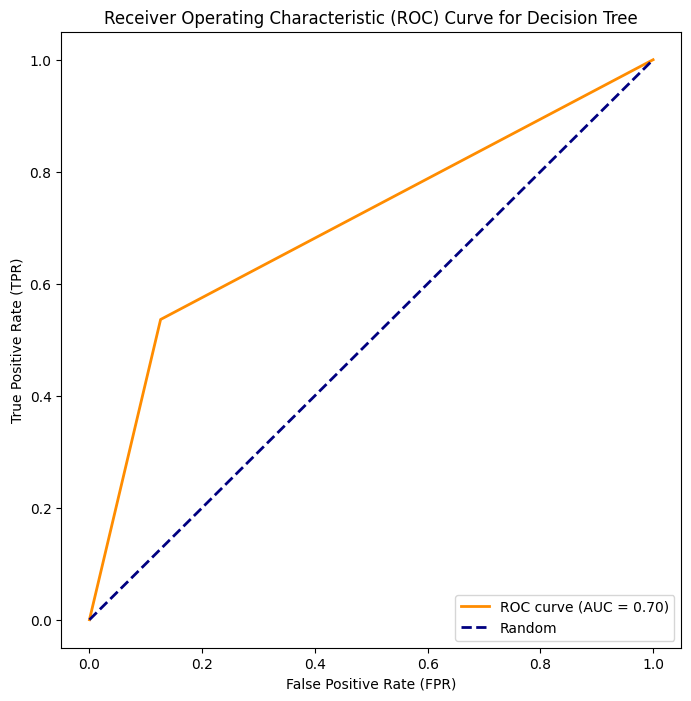

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

predictions_dt = dt.predict(x_test)

dt_cm = confusion_matrix(y_test, predictions_dt)
# Extract TP, TN, FP, FN from confusion matrix
TP, TN, FP, FN = dt_cm[1, 1], dt_cm[0, 0], dt_cm[0, 1], dt_cm[1, 0]
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))
print("Accuracy:")
print(accuracy_score(y_test, predictions_dt))
print("Balanced Accuracy:")
print(balanced_accuracy_score(y_test, predictions_dt))
print("Sensitivity (Recall):")
print(recall_score(y_test, predictions_dt))
print("Specificity:")
print(specificity)
print("F1 Score:")
print(f1_score(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))

predictions_dt_proba = dt.predict_proba(x_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_dt_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Random Forest Classifier

Confusion Matrix:
[[5705  253]
 [ 777  842]]
Accuracy:
0.8640622937838195
Balanced Accuracy:
0.7388051028809657
Sensitivity (Recall):
0.5200741198270538
Specificity:
0.9575360859348775
F1 Score:
0.6204863669859985
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5958
           1       0.77      0.52      0.62      1619

    accuracy                           0.86      7577
   macro avg       0.82      0.74      0.77      7577
weighted avg       0.86      0.86      0.85      7577



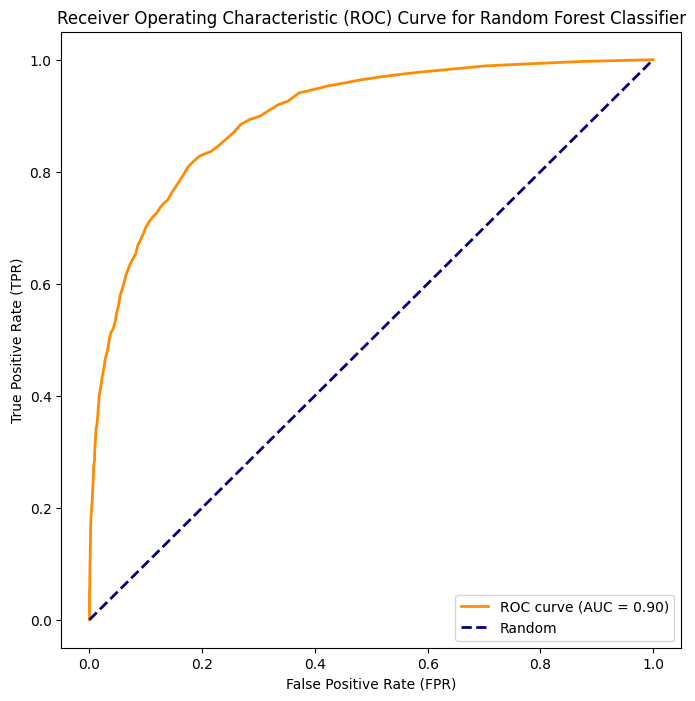

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

predictions_rf = rf.predict(x_test)

rf_cm = confusion_matrix(y_test, predictions_rf)
# Extract TP, TN, FP, FN from confusion matrix
TP, TN, FP, FN = rf_cm[1, 1], rf_cm[0, 0], rf_cm[0, 1], rf_cm[1, 0]
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))
print("Accuracy:")
print(accuracy_score(y_test, predictions_rf))
print("Balanced Accuracy:")
print(balanced_accuracy_score(y_test, predictions_rf))
print("Sensitivity (Recall):")
print(recall_score(y_test, predictions_rf))
print("Specificity:")
print(specificity)
print("F1 Score:")
print(f1_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

predictions_rf_proba = rf.predict_proba(x_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_rf_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


# XGBoost Classifier

Confusion Matrix:
[[5622  336]
 [ 658  961]]
Accuracy:
0.8688135145836083
Balanced Accuracy:
0.7685907591559695
Sensitivity (Recall):
0.5935762816553428
Specificity:
0.9436052366565961
F1 Score:
0.659122085048011
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5958
           1       0.74      0.59      0.66      1619

    accuracy                           0.87      7577
   macro avg       0.82      0.77      0.79      7577
weighted avg       0.86      0.87      0.86      7577



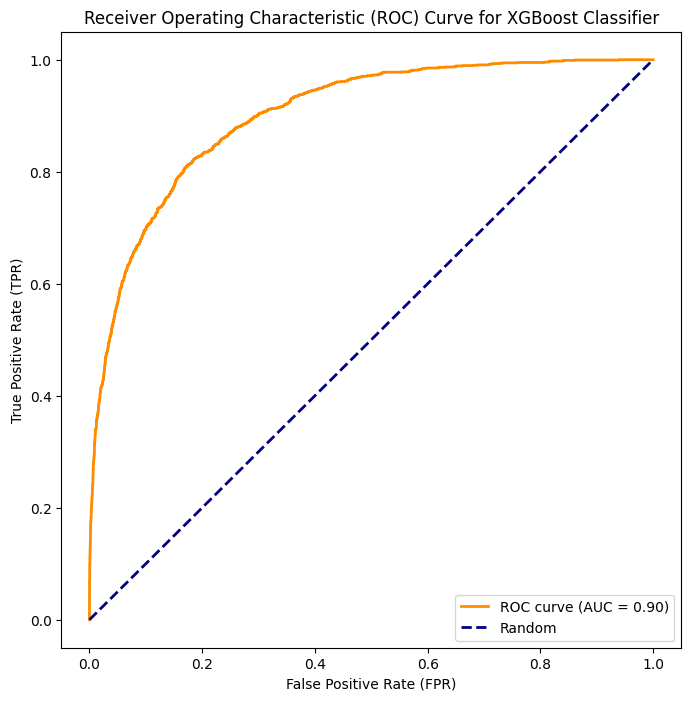

In [86]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

predictions_xgb = xgb.predict(x_test)

xgb_cm = confusion_matrix(y_test, predictions_xgb)
# Extract TP, TN, FP, FN from confusion matrix
TP, TN, FP, FN = xgb_cm[1, 1], xgb_cm[0, 0], xgb_cm[0, 1], xgb_cm[1, 0]
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Avoid division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_xgb))
print("Accuracy:")
print(accuracy_score(y_test, predictions_xgb))
print("Balanced Accuracy:")
print(balanced_accuracy_score(y_test, predictions_xgb))
print("Sensitivity (Recall):")
print(recall_score(y_test, predictions_xgb))
print("Specificity:")
print(specificity)
print("F1 Score:")
print(f1_score(y_test, predictions_xgb))
print(classification_report(y_test, predictions_xgb))

predictions_xgb_proba = xgb.predict_proba(x_test)[:, 1]  # Probability of class 1 (positive class)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_xgb_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()
